[KRITIK AGARWAL 19BBTCS067](https://github.com/Kritik007)

Deep Learning Lab Experiment 6

Two Layers Auto-Encoder: Write a program to implement the build a 2 layers auto-encoder with tensor flow to compress images to lower size

---

An Autoencoder is a tool for learning data coding efficiently in an unsupervised manner. It is a type of artificial neural network that helps you to learn the representation of data sets for dimensionality reduction by training the neural network to ignore the signal noise. It is a great tool for recreating an input.

---

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [ ]:
#build the model using the tensorflow.keras.models API
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

In [ ]:
#summary of the encoder architecture
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 2)                 602       
                                                                 
 encoder_output (LeakyReLU)  (None, 2)                 0         
                                                                 
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_______________________________________________

In [ ]:
#Building the Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [ ]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [ ]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 decoder_dense_1 (Dense)     (None, 300)               900       
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 decoder_dense_2 (Dense)     (None, 784)               235984    
                                                                 
 decoder_output (LeakyReLU)  (None, 784)               0         
                                                                 
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_______________________________________________

In [ ]:
#Building the Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

In [ ]:
ae.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 784)]             0         
                                                                 
 encoder_model (Functional)  (None, 2)                 236102    
                                                                 
 decoder_model (Functional)  (None, 784)               236884    
                                                                 
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model building process
import tensorflow.keras.optimizers  
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Loading the MNIST Dataset and Training Autoencoder
import tensorflow.keras.datasets
import numpy

(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#train the autoencoder using the fit method
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 13s 49ms/step - loss: 0.0605 - val_loss: 0.0552
Epoch 2/20
235/235 [==============================] - 7s 30ms/step - loss: 0.0543 - val_loss: 0.0530
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0525 - val_loss: 0.0514
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0510 - val_loss: 0.0502
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0500 - val_loss: 0.0495
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0492 - val_loss: 0.0488
Epoch 7/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 8/20
235/235 [==============================] - 6s 23ms/step - loss: 0.0481 - val_loss: 0.0479
Epoch 9/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0477 - val_loss: 0.0477
Epoch 10/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0474 - val_l

In [ ]:
#Making Predictions
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)

1875/1875 [==============================] - 5s 3ms/step


In [ ]:
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

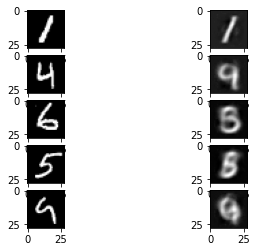

In [ ]:
# output of the decoder is a 1D vector of length 784
# display the reconstructed images, the decoder output is reshaped to 28x28
import matplotlib.pyplot as plt
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

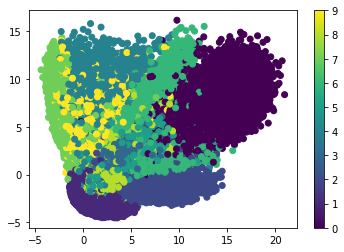

In [ ]:
#To have a better understanding of the output of the encoder model, let's display all the 1D vectors it returns
plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train) 
plt.colorbar()